### The goal for this project is to build and train a regression model on the Capital Bike Share (Washington, D.C.) Kaggle data set, in order to predict demand for bicycle rentals at any given hour, based on time and weather. The value in the count column is the one we need to predict. 
##### Note: Beware that combining the columns 'casual' and 'registerd' results in the column count. Therefore you should exclude those columns from your model!

In [1]:
# importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
##### reading the dataset 
df = pd.read_csv('/home/arman/github_portfolio_spiced/Project_03_Linear_Regression/train.csv')
df

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129


In [3]:
df.shape

(10886, 12)

In [ ]:
##### understanding data set 
#datetime - hourly date + timestamp  
#season -  1 = spring, 2 = summer, 3 = fall, 4 = winter 
#holiday - whether the day is considered a holiday
#workingday - whether the day is neither a weekend nor holiday
#weather 1: Clear, Few clouds, Partly cloudy, Partly cloudy
        #2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
        #3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
        #4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog 
#temp - temperature in Celsius
#atemp - "feels like" temperature in Celsius
#humidity - relative humidity
#windspeed - wind speed
#casual - number of non-registered user rentals initiated
#registered - number of registered user rentals initiated
#count - number of total rentals

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [6]:
##### we see that we have no NaN values! NICE!

In [7]:
df['datetime']

0        2011-01-01 00:00:00
1        2011-01-01 01:00:00
2        2011-01-01 02:00:00
3        2011-01-01 03:00:00
4        2011-01-01 04:00:00
                ...         
10881    2012-12-19 19:00:00
10882    2012-12-19 20:00:00
10883    2012-12-19 21:00:00
10884    2012-12-19 22:00:00
10885    2012-12-19 23:00:00
Name: datetime, Length: 10886, dtype: object

In [8]:
##### Timestamp - column name that contains the datetime values
##### we wanna convert datetime column into the datetime64 object
df['datetime'] = pd.to_datetime(df['datetime'])
df['datetime']

0       2011-01-01 00:00:00
1       2011-01-01 01:00:00
2       2011-01-01 02:00:00
3       2011-01-01 03:00:00
4       2011-01-01 04:00:00
                ...        
10881   2012-12-19 19:00:00
10882   2012-12-19 20:00:00
10883   2012-12-19 21:00:00
10884   2012-12-19 22:00:00
10885   2012-12-19 23:00:00
Name: datetime, Length: 10886, dtype: datetime64[ns]

<AxesSubplot:xlabel='atemp', ylabel='Count'>

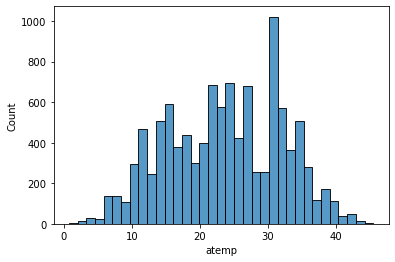

In [9]:
#####lets make some histogtrams to understand the distribution of numerical variables ####
#####lets focus on some important ones####
sns.histplot(data=df, x="atemp")
### we see more bikes are rented when it is around 30° C

<AxesSubplot:xlabel='weather', ylabel='Count'>

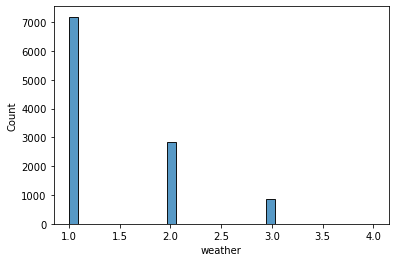

In [10]:
sns.histplot(data=df, x="weather")
#### we see people rented more bikes when the weather is more clear, i.e. not raining

<AxesSubplot:xlabel='workingday', ylabel='Count'>

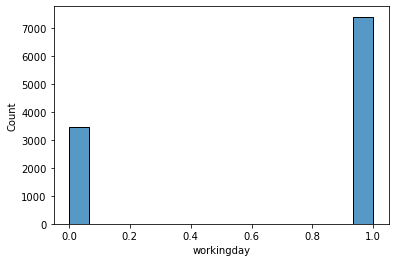

In [11]:
sns.histplot(data=df, x="workingday")

<AxesSubplot:xlabel='holiday', ylabel='Count'>

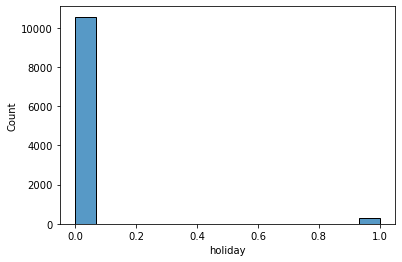

In [12]:
sns.histplot(data=df, x="holiday")

In [13]:
### think what other histograms can be useful...bring it here also '##'

In [14]:
##### now lets add some new columns, extracted from timestamp, that could give more insights to data..
##### the new added columns will have a title of 'month', 'weekday', 'hour'
df['year'] = df['datetime'].dt.year
df['month'] = df['datetime'].dt.month
df['weekday'] = df['datetime'].dt.day_name()
df['hour'] = df['datetime'].dt.hour

df

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,weekday,hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,2011,1,Saturday,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,2011,1,Saturday,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,2011,1,Saturday,2
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,2011,1,Saturday,3
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,2011,1,Saturday,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336,2012,12,Wednesday,19
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241,2012,12,Wednesday,20
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,2012,12,Wednesday,21
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129,2012,12,Wednesday,22


<AxesSubplot:xlabel='year', ylabel='count'>

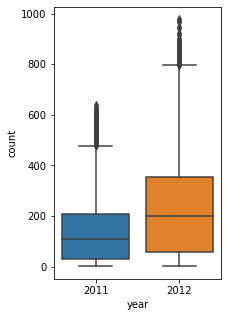

In [15]:
plt.figure(figsize=(3,5))
sns.boxplot(x='year',y='count', data=df)
### we see 2012 had higher bike rentals than 2011

<AxesSubplot:xlabel='month', ylabel='count'>

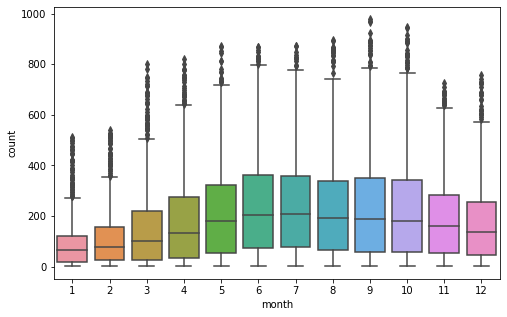

In [16]:
plt.figure(figsize=(8,5))
sns.boxplot(x='month',y='count', data=df)
### we see people rented more bikes between june and october

<AxesSubplot:xlabel='hour', ylabel='count'>

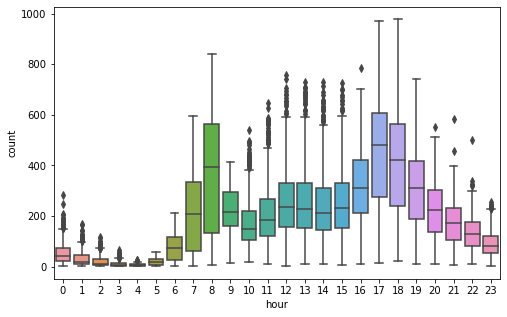

In [17]:
plt.figure(figsize=(8,5))
sns.boxplot(x='hour',y='count', data=df)
### we see people rented more bikes between 6-9 o clock in the morning and 17-19 o clock

In [18]:
df.weekday.value_counts()

Saturday     1584
Sunday       1579
Thursday     1553
Monday       1551
Wednesday    1551
Tuesday      1539
Friday       1529
Name: weekday, dtype: int64

<AxesSubplot:xlabel='weekday', ylabel='count'>

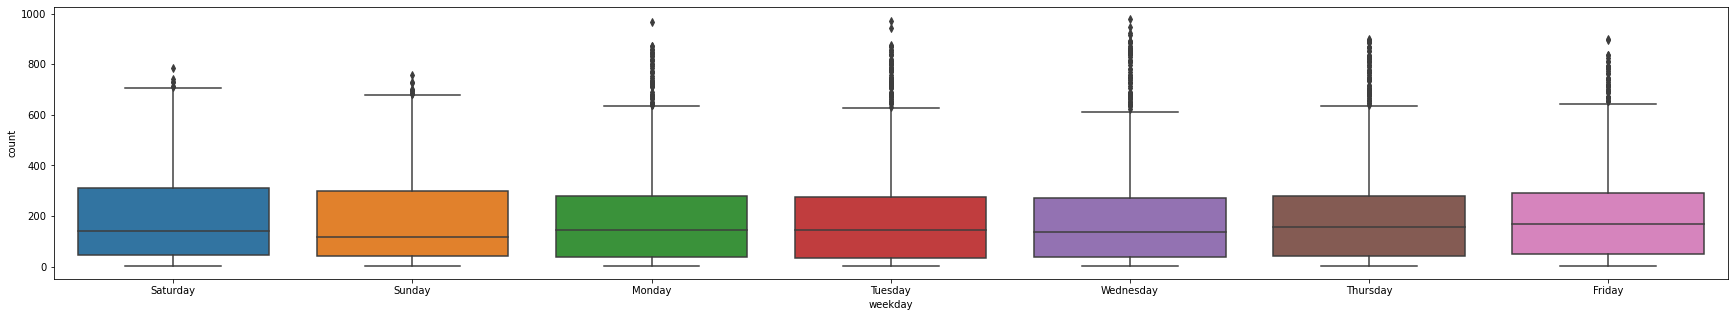

In [19]:
plt.figure(figsize=(30,5))
sns.boxplot(x='weekday',y='count', data=df)
#### we see weekday did not extremely made a difference in the total number of renting bikes

<AxesSubplot:xlabel='hour', ylabel='count'>

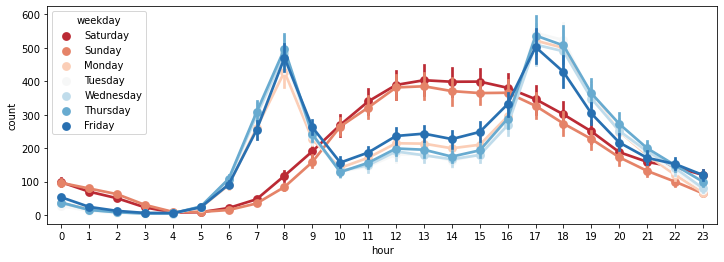

In [20]:
plt.figure(figsize=(12,4))

sns.pointplot(x = "hour", y = "count", data = df, hue = "weekday", palette = "RdBu", legend='full')

### We see different patterns for number of rented bikes in different times of the day, during the week and on the weekend 
- During the week, around 8 o'clock in the morning (going to work) and around 17 o'clock in the afternoon (coming back from work) are the peaks of bike rentals, however, during the weekend the peak of bike rentals are between 12 and 16 o'clock

<AxesSubplot:xlabel='windspeed', ylabel='count'>

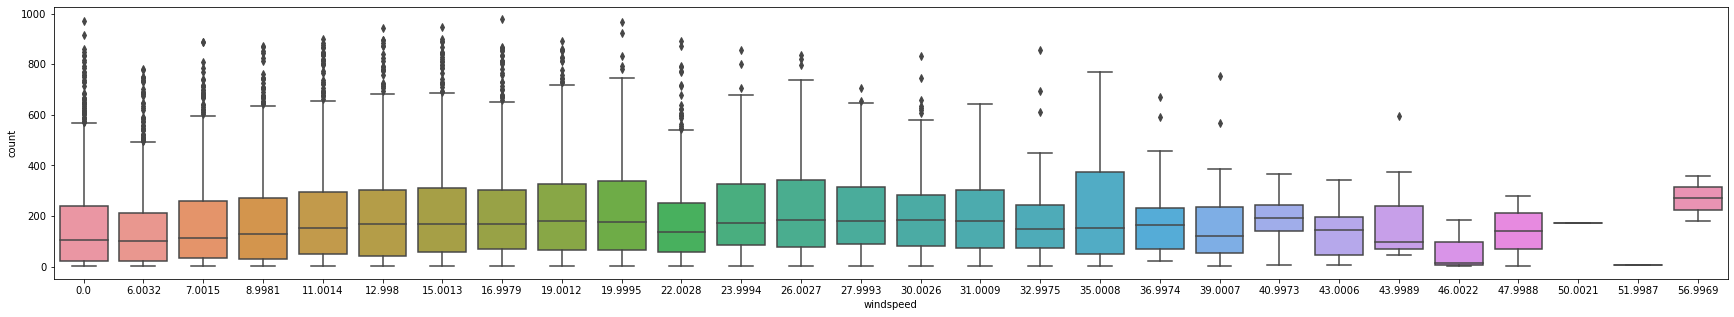

In [24]:
plt.figure(figsize=(30,5))
sns.boxplot(x='windspeed',y='count', data=df)
#### we see windspeed did not mhave a nconsiderable effect on the number of rented bikes

<AxesSubplot:>

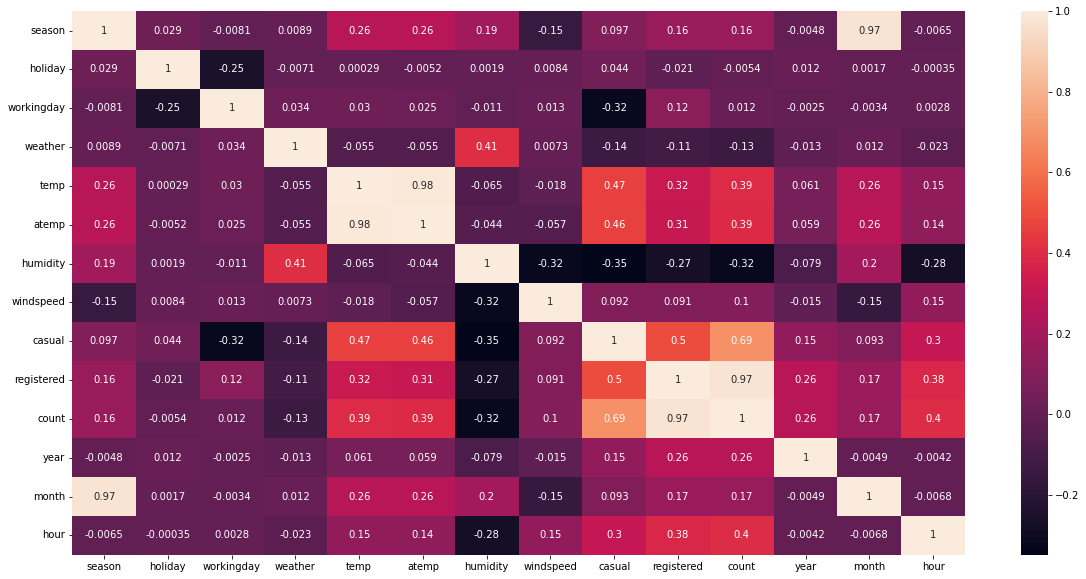

In [25]:
## lets take a look at correlation heatmap
fig,ax= plt.subplots()
fig.set_size_inches(20,10)
sns.heatmap(df.corr(), annot= True)

In [26]:
# We want to drop one of the columns whose correlation with the other column is above a certain threshold (0.8)
# also it was mentioned in the beginning that we should exclude columns 'casual' and 'registered'
# so let's drop "atemp", "casual", "registered", and "season" 

In [27]:
##### it was mentioned in the beginning that we should exclude columns 'casual' and 'registered'

df.drop(['casual', 'registered'], axis = 1, inplace = True)
df

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,year,month,weekday,hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,16,2011,1,Saturday,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,40,2011,1,Saturday,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,32,2011,1,Saturday,2
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,13,2011,1,Saturday,3
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,1,2011,1,Saturday,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,336,2012,12,Wednesday,19
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,241,2012,12,Wednesday,20
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,168,2012,12,Wednesday,21
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,129,2012,12,Wednesday,22


In [28]:
df.drop(['atemp', 'season'], axis = 1, inplace = True)
df

,datetime,holiday,workingday,weather,temp,humidity,windspeed,count,year,month,weekday,hour
0,2011-01-01 00:00:00,0,0,1,9.84,81,0.0000,16,2011,1,Saturday,0
1,2011-01-01 01:00:00,0,0,1,9.02,80,0.0000,40,2011,1,Saturday,1
2,2011-01-01 02:00:00,0,0,1,9.02,80,0.0000,32,2011,1,Saturday,2
3,2011-01-01 03:00:00,0,0,1,9.84,75,0.0000,13,2011,1,Saturday,3
4,2011-01-01 04:00:00,0,0,1,9.84,75,0.0000,1,2011,1,Saturday,4
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,0,1,1,15.58,50,26.0027,336,2012,12,Wednesday,19
10882,2012-12-19 20:00:00,0,1,1,14.76,57,15.0013,241,2012,12,Wednesday,20
10883,2012-12-19 21:00:00,0,1,1,13.94,61,15.0013,168,2012,12,Wednesday,21
10884,2012-12-19 22:00:00,0,1,1,13.94,61,6.0032,129,2012,12,Wednesday,22


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   holiday     10886 non-null  int64         
 2   workingday  10886 non-null  int64         
 3   weather     10886 non-null  int64         
 4   temp        10886 non-null  float64       
 5   humidity    10886 non-null  int64         
 6   windspeed   10886 non-null  float64       
 7   count       10886 non-null  int64         
 8   year        10886 non-null  int64         
 9   month       10886 non-null  int64         
 10  weekday     10886 non-null  object        
 11  hour        10886 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(8), object(1)
memory usage: 1020.7+ KB


In [30]:
# let's change the data type in weekday from object to integer to be able to use it in the ML process
df['weekday'] = df['datetime'].dt.weekday
df

,datetime,holiday,workingday,weather,temp,humidity,windspeed,count,year,month,weekday,hour
0,2011-01-01 00:00:00,0,0,1,9.84,81,0.0000,16,2011,1,5,0
1,2011-01-01 01:00:00,0,0,1,9.02,80,0.0000,40,2011,1,5,1
2,2011-01-01 02:00:00,0,0,1,9.02,80,0.0000,32,2011,1,5,2
3,2011-01-01 03:00:00,0,0,1,9.84,75,0.0000,13,2011,1,5,3
4,2011-01-01 04:00:00,0,0,1,9.84,75,0.0000,1,2011,1,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,0,1,1,15.58,50,26.0027,336,2012,12,2,19
10882,2012-12-19 20:00:00,0,1,1,14.76,57,15.0013,241,2012,12,2,20
10883,2012-12-19 21:00:00,0,1,1,13.94,61,15.0013,168,2012,12,2,21
10884,2012-12-19 22:00:00,0,1,1,13.94,61,6.0032,129,2012,12,2,22


<AxesSubplot:>

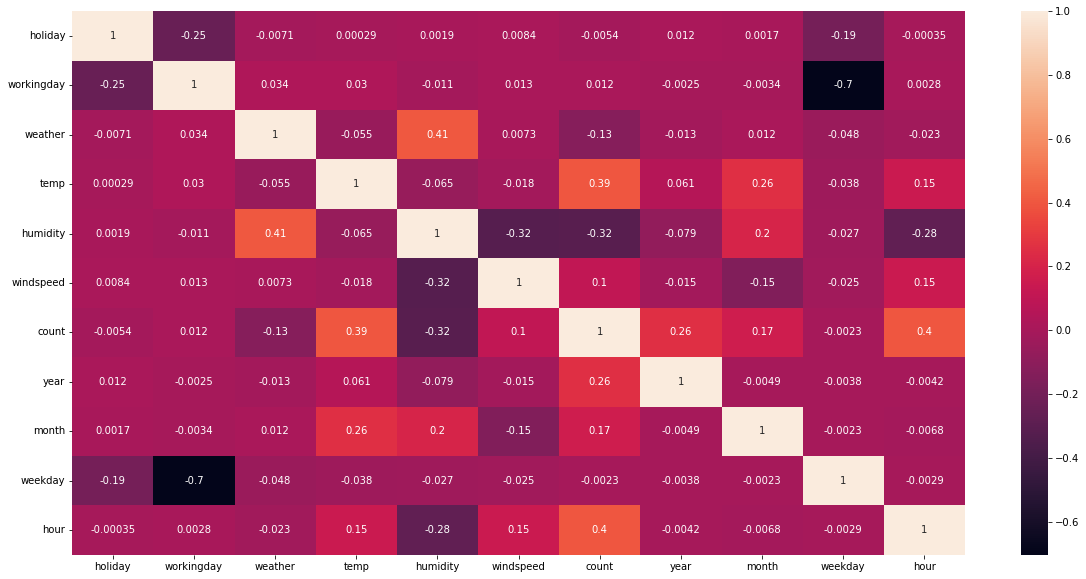

In [31]:
## lets take a look at correlation heatmap now
fig,ax= plt.subplots()
fig.set_size_inches(20,10)
sns.heatmap(df.corr(), annot= True)

### Define Features and output columns (i.e., X and y) for ML model

In [32]:
##### now lets assign X (input data/features) , y (output)) data

X = df.loc[:,['holiday', 'workingday', 'weather', 'temp','humidity', 'windspeed', 'month', 'weekday', 'hour']]
y= df['count']

In [33]:
X.head()

,holiday,workingday,weather,temp,humidity,windspeed,month,weekday,hour
0,0,0,1,9.84,81,0.0,1,5,0
1,0,0,1,9.02,80,0.0,1,5,1
2,0,0,1,9.02,80,0.0,1,5,2
3,0,0,1,9.84,75,0.0,1,5,3
4,0,0,1,9.84,75,0.0,1,5,4


#### Train/test split

In [34]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=14)

In [35]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((8164, 9), (2722, 9), (8164,), (2722,))

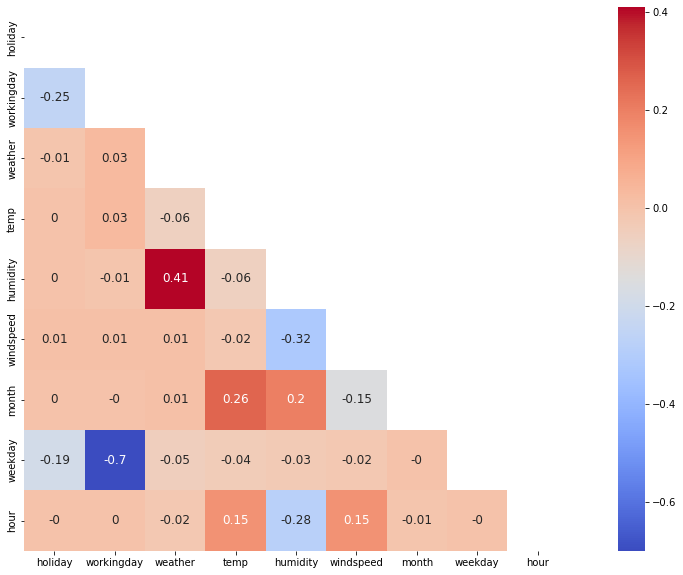

In [36]:
plt.figure(figsize = (18,10))

corr = X.corr()

mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(corr.round(2), mask = mask, square = True, annot = True, cmap = 'coolwarm', annot_kws = {'size': 12});

### lets go to the modelling

In [38]:
#### lets go with random forest 

from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score


In [39]:
rf=RandomForestRegressor()

In [40]:
rf.fit(X_train, y_train)

RandomForestRegressor()

In [41]:
y_pred=rf.predict(X_train)

In [42]:
print(r2_score(y_train, y_pred))

0.981234443733851


In [43]:
y_pred_test=rf.predict(X_test)

In [44]:
print(r2_score(y_test, y_pred_test))

0.8602509835437088
